In [79]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# tickers = [s + ".BK" for s in open("tickers_020468.txt").read().split()]
# start_date = '2023-03-28'
# end_date = '2025-04-03'
# data = yf.download(tickers, start=start_date, end=end_date, rounding=True, group_by='column', progress=True,auto_adjust=True, timeout=None)
data = pd.read_feather('tickers_data_020468.feather')
tickers = data.columns.get_level_values(0).unique()
# data.to_feather('tickers_data_020468.feather')

In [49]:
def calculate_ema(close, length):
    ema = pd.DataFrame()
    for i in range(len(close.columns)):
        ema = pd.concat([ema, close.iloc[:, i]/ta.ema(close.iloc[:, i], length=length)], axis=1)
    ema.columns = close.columns
    return ema

ema20 = calculate_ema(data['Close'], length=20)
ema50 = calculate_ema(data['Close'], length=50)
ema100 = calculate_ema(data['Close'], length=100)
ema150 = calculate_ema(data['Close'], length=150)
ema200 = calculate_ema(data['Close'], length=200)

In [50]:
mean_val = ((data['Volume']*data['Close']).ewm(span=20).mean()).ffill().fillna(0)
percentiles = np.percentile(mean_val, [70, 98], axis=1)
small = mean_val < percentiles[0][:, None]
medium = (mean_val > percentiles[0][:, None]) & (mean_val < percentiles[1][:, None])
big = mean_val > percentiles[1][:, None]

In [51]:
# small
smean_ema20 = ema20[small][ema20[small] > 0].mean(axis=1, skipna=True)
smean_ema50 = ema50[small][ema50[small] > 0].mean(axis=1, skipna=True)
smean_ema100 = ema100[small][ema100[small] > 0].mean(axis=1, skipna=True)
smean_ema150 = ema150[small][ema150[small] > 0].mean(axis=1, skipna=True)
smean_ema200 = ema200[small][(ema200[small] > 0) & (ema200[small] < 5)].mean(axis=1, skipna=True)

# mid
mmean_ema20 = ema20[medium].mean(axis=1, skipna=True)
mmean_ema50 = ema50[medium].mean(axis=1, skipna=True)
mmean_ema100 = ema100[medium].mean(axis=1, skipna=True)
mmean_ema150 = ema150[medium].mean(axis=1, skipna=True)
mmean_ema200 = ema200[medium].mean(axis=1, skipna=True)

# big
bmean_ema20 = ema20[big].mean(axis=1, skipna=True)
bmean_ema50 = ema50[big].mean(axis=1, skipna=True)
bmean_ema100 = ema100[big].mean(axis=1, skipna=True)
bmean_ema150 = ema150[big].mean(axis=1, skipna=True)
bmean_ema200 = ema200[big].mean(axis=1, skipna=True)

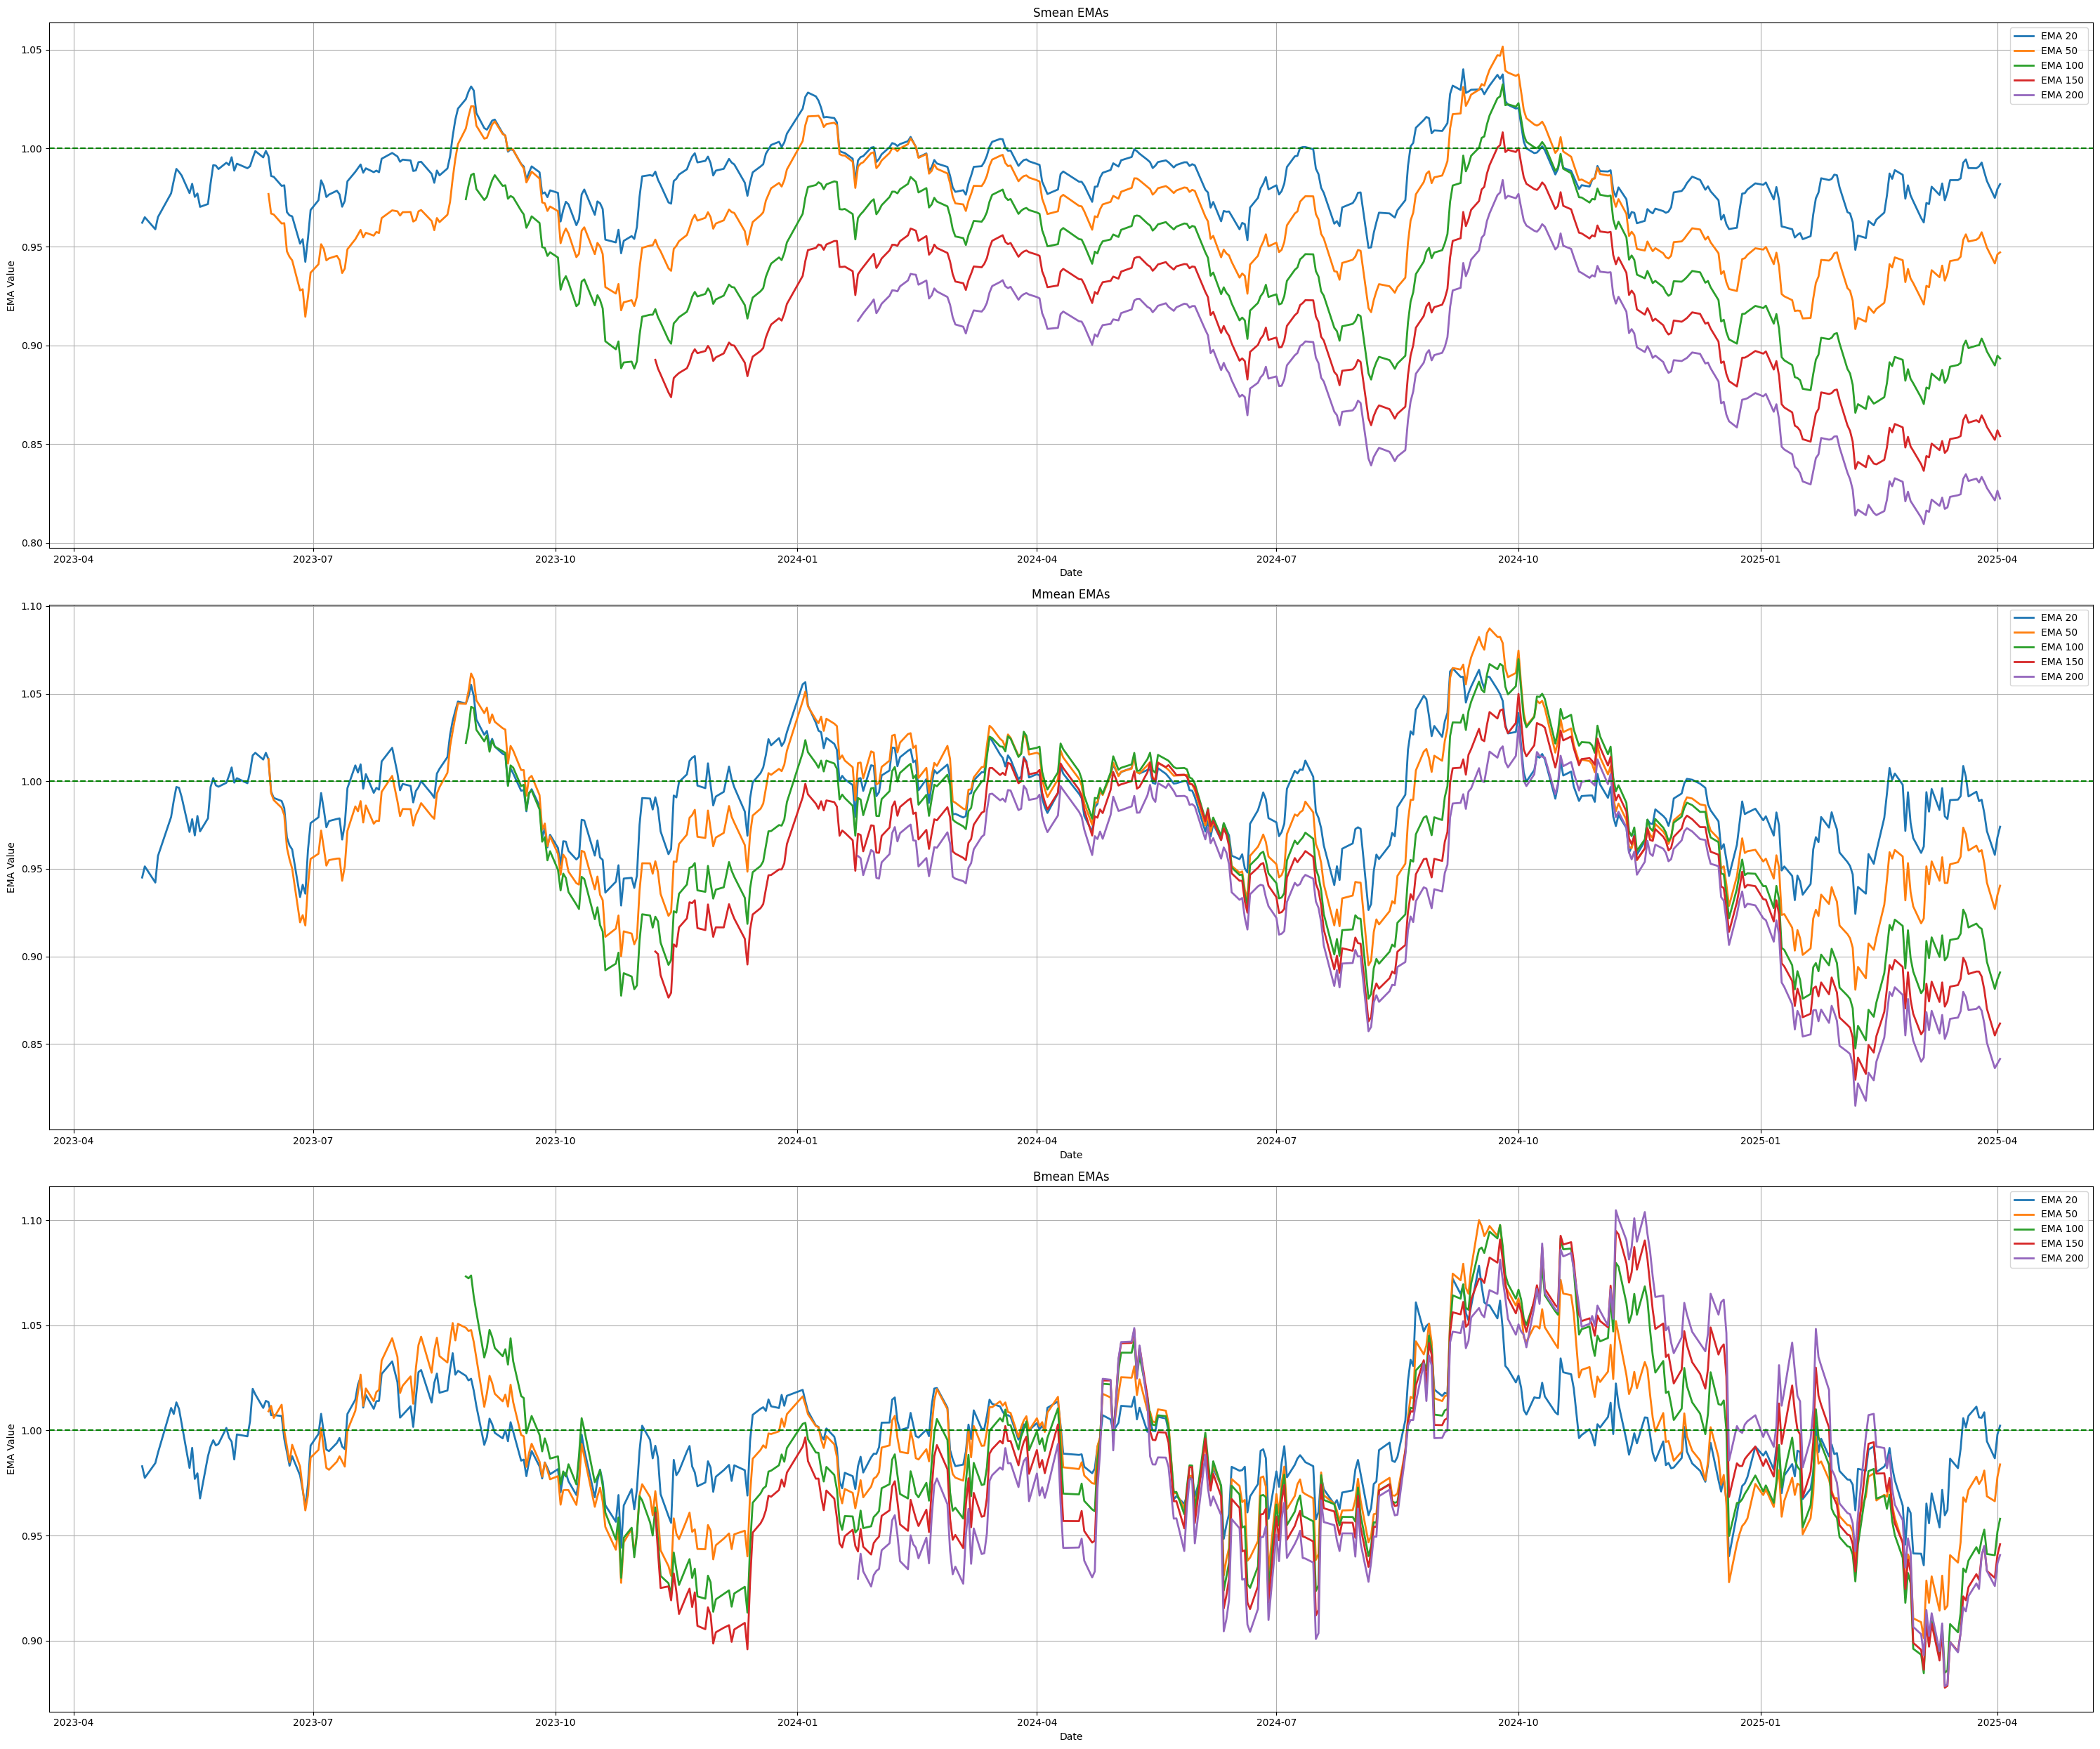

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(30, 25))

# Plot chart แรก (smean)
axes[0].plot(smean_ema20, label="EMA 20", linewidth=2)
axes[0].plot(smean_ema50, label="EMA 50", linewidth=2)
axes[0].plot(smean_ema100, label="EMA 100", linewidth=2)
axes[0].plot(smean_ema150, label="EMA 150", linewidth=2)
axes[0].plot(smean_ema200, label="EMA 200", linewidth=2)
axes[0].axhline(y=1, color='green', linestyle='--')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("EMA Value")
axes[0].legend()
axes[0].grid(True)
axes[0].set_title('Smean EMAs')

# Plot chart ที่สอง (mmean)
axes[1].plot(mmean_ema20, label="EMA 20", linewidth=2)
axes[1].plot(mmean_ema50, label="EMA 50", linewidth=2)
axes[1].plot(mmean_ema100, label="EMA 100", linewidth=2)
axes[1].plot(mmean_ema150, label="EMA 150", linewidth=2)
axes[1].plot(mmean_ema200, label="EMA 200", linewidth=2)
axes[1].axhline(y=1, color='green', linestyle='--')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("EMA Value")
axes[1].legend()
axes[1].grid(True)
axes[1].set_title('Mmean EMAs')

# Plot chart ที่สาม (bmean)
axes[2].plot(bmean_ema20, label="EMA 20", linewidth=2)
axes[2].plot(bmean_ema50, label="EMA 50", linewidth=2)
axes[2].plot(bmean_ema100, label="EMA 100", linewidth=2)
axes[2].plot(bmean_ema150, label="EMA 150", linewidth=2)
axes[2].plot(bmean_ema200, label="EMA 200", linewidth=2)
axes[2].axhline(y=1, color='green', linestyle='--')
axes[2].set_xlabel("Date")
axes[2].set_ylabel("EMA Value")
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('Bmean EMAs')

# แสดงกราฟ
plt.tight_layout()
plt.show()

In [53]:
def calculate_rsi(close, length=14):
    rsi = pd.DataFrame()
    for i in range(len(close.columns)):
        rsi = pd.concat([rsi, ta.rsi(close.iloc[:, i], length=length)], axis=1)
    rsi.columns = close.columns
    return rsi

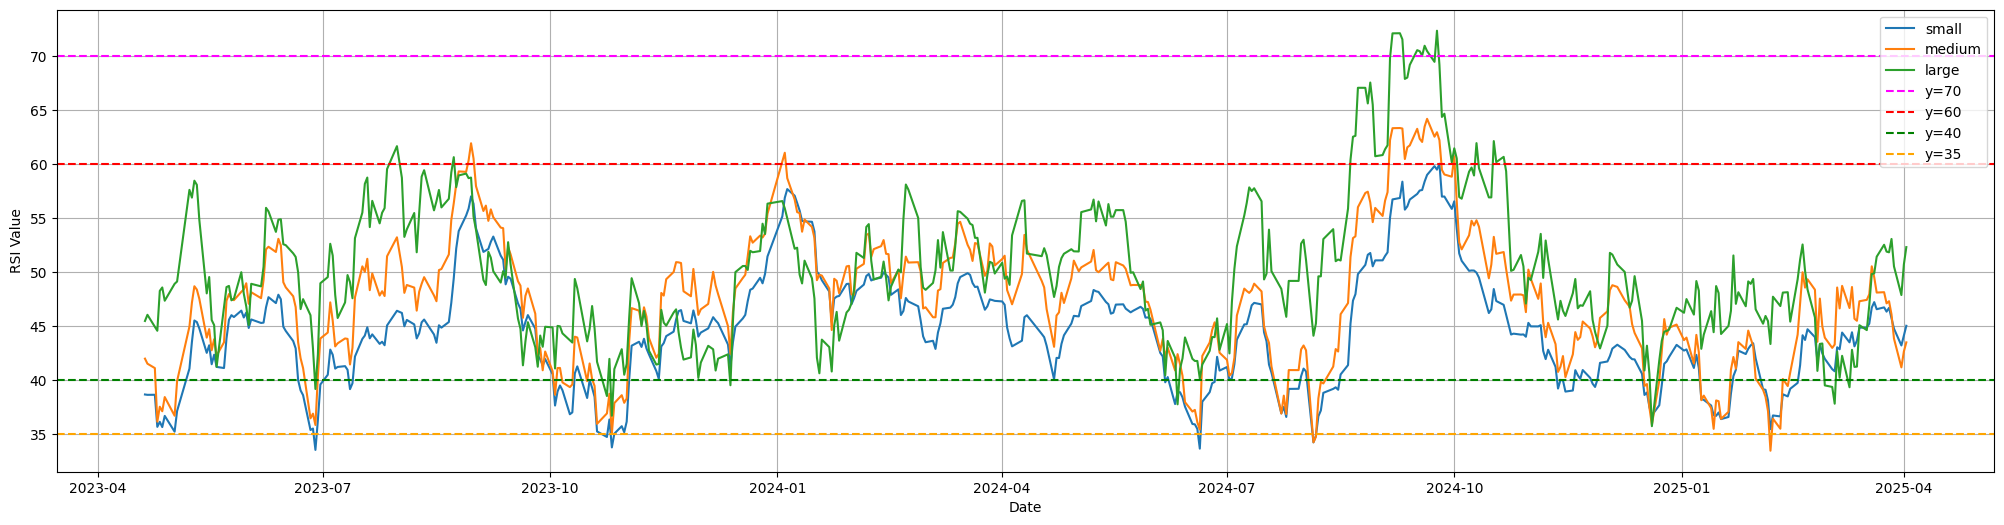

In [54]:
def calculate_rsi(close, length=14):
    rsi = pd.DataFrame()
    for i in range(len(close.columns)):
        rsi = pd.concat([rsi, ta.rsi(close.iloc[:, i], length=length)], axis=1)
    rsi.columns = close.columns
    return rsi

rsi = calculate_rsi(data['Close'])
srsi = rsi[small].mean(axis=1, skipna=True)
mrsi = rsi[medium].mean(axis=1, skipna=True)
brsi = rsi[big].mean(axis=1, skipna=True)

plt.figure(figsize=(25, 6))

plt.plot(srsi, label='small', linewidth=1.5)
plt.plot(mrsi, label='medium',linewidth=1.5)
plt.plot(brsi, label='large',linewidth=1.5)
plt.axhline(y=70, color='magenta', linestyle='--', label="y=70")
plt.axhline(y=60, color='red', linestyle='--', label="y=60")
plt.axhline(y=40, color='green', linestyle='--', label="y=40")
plt.axhline(y=35, color='orange', linestyle='--', label="y=35")

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
rsi = calculate_rsi(data['Close'])
srsi = rsi[small].mean(axis=1, skipna=True)
mrsi = rsi[medium].mean(axis=1, skipna=True)
brsi = rsi[big].mean(axis=1, skipna=True)

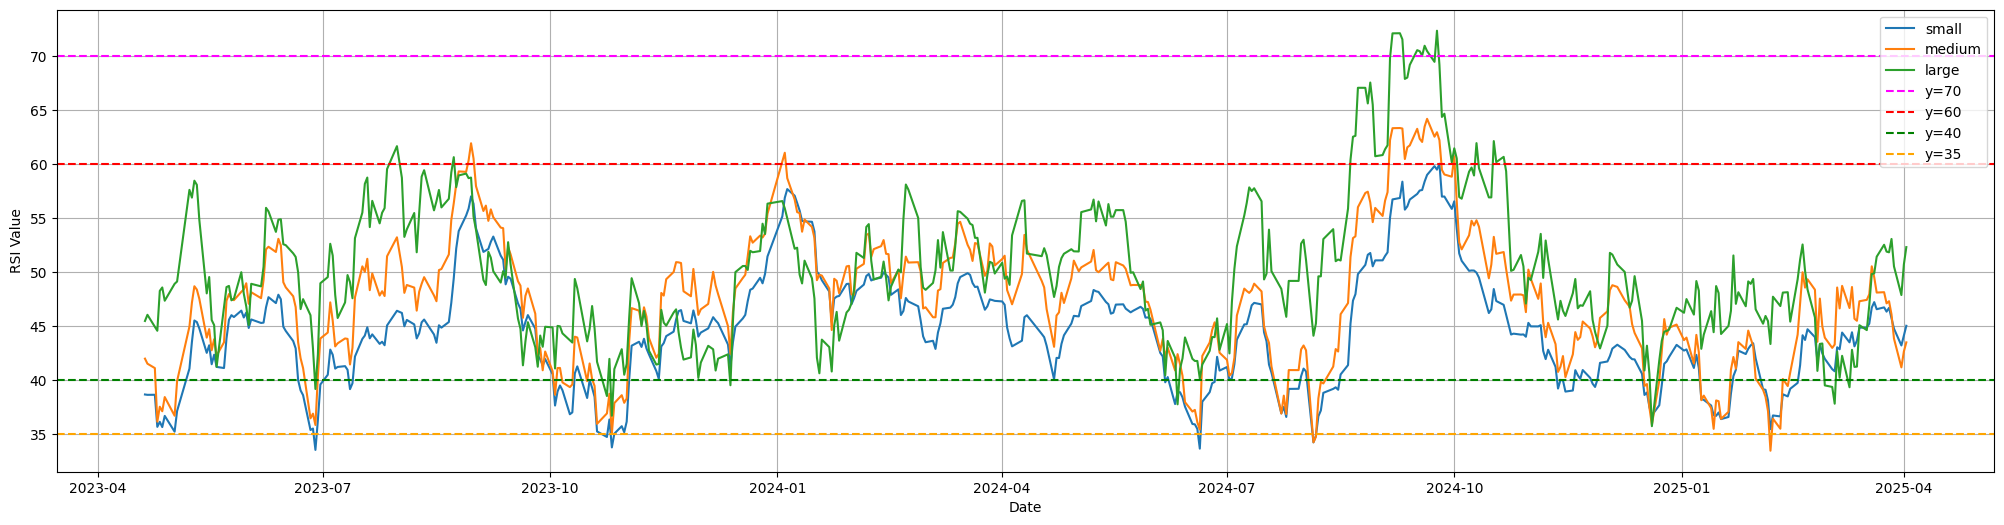

In [56]:
plt.figure(figsize=(25, 6))

plt.plot(srsi, label='small', linewidth=1.5)
plt.plot(mrsi, label='medium',linewidth=1.5)
plt.plot(brsi, label='large',linewidth=1.5)
plt.axhline(y=70, color='magenta', linestyle='--', label="y=70")
plt.axhline(y=60, color='red', linestyle='--', label="y=60")
plt.axhline(y=40, color='green', linestyle='--', label="y=40")
plt.axhline(y=35, color='orange', linestyle='--', label="y=35")

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
def calculate_adx(high, low, close):
    adx = pd.DataFrame()
    pos = pd.DataFrame()
    neg = pd.DataFrame()
    for i in range(len(close.columns)):
        t = ta.adx(high.iloc[:, i], low.iloc[:, i], close.iloc[:, i])
        t1 = t.iloc[:, 0]
        t2 = t.iloc[:, 1]
        t3 = t.iloc[:, 2]
        adx = pd.concat([adx, t1], axis=1)
        pos = pd.concat([pos, t2], axis=1)
        neg = pd.concat([neg, t3], axis=1)
    adx.columns = close.columns
    pos.columns = close.columns
    neg.columns = close.columns
    return adx, pos, neg

In [58]:
adx, adx_pos, adx_neg = calculate_adx(data['High'], data['Low'], data['Close'])

In [59]:
sadx = adx[small].mean(axis=1, skipna=True)
madx = adx[medium].mean(axis=1, skipna=True)
badx = adx[big].mean(axis=1, skipna=True)

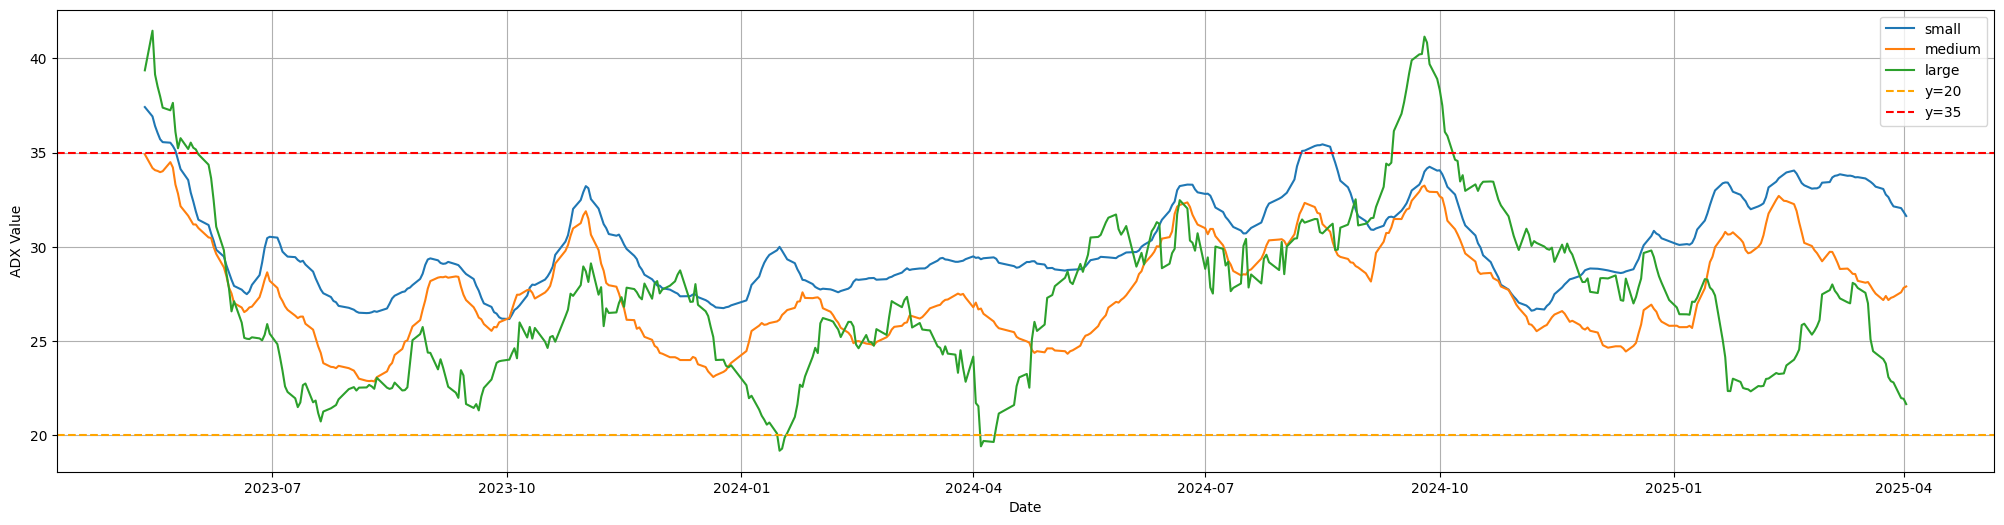

In [60]:
plt.figure(figsize=(25, 6))

plt.plot(sadx, label='small', linewidth=1.5)
plt.plot(madx, label='medium',linewidth=1.5)
plt.plot(badx, label='large',linewidth=1.5)
plt.axhline(y=20, color='orange', linestyle='--', label="y=20")
plt.axhline(y=35, color='red', linestyle='--', label="y=35")

plt.xlabel("Date")
plt.ylabel("ADX Value")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
def wavetrend(data):
    wt = pd.DataFrame()
    n1, n2 = 10, 21

    for i in range(len(data['Close'].columns)):
        high = data['High'].iloc[:, i]
        low = data['Low'].iloc[:, i]
        close = data['Close'].iloc[:, i]
        ap = (high + low + close) / 3
        esa = ta.ema(ap, length=n1)
        d = abs(ap - esa)
        d = ta.ema(d, length=n1)
        ci = (ap - esa) / (0.015 * d)
        wt1 = ta.ema(ci, length=n2)
        # wt2 = ta.ema(wt1, length=4)
    
        # wt['wt1'] = wt1
        # wt['wt2'] = wt2
        # wt['wt_osc'] = wt1 - wt2
        wt = pd.concat([wt, wt1], axis=1)
    wt.columns = data['Close'].columns
    return wt # wt['wt1'], wt['wt2'], wt['wt_osc']

In [65]:
wt = wavetrend(data)

In [66]:
swt = wt[small].mean(axis=1, skipna=True)
mwt = wt[medium].mean(axis=1, skipna=True)
bwt = wt[big].mean(axis=1, skipna=True)

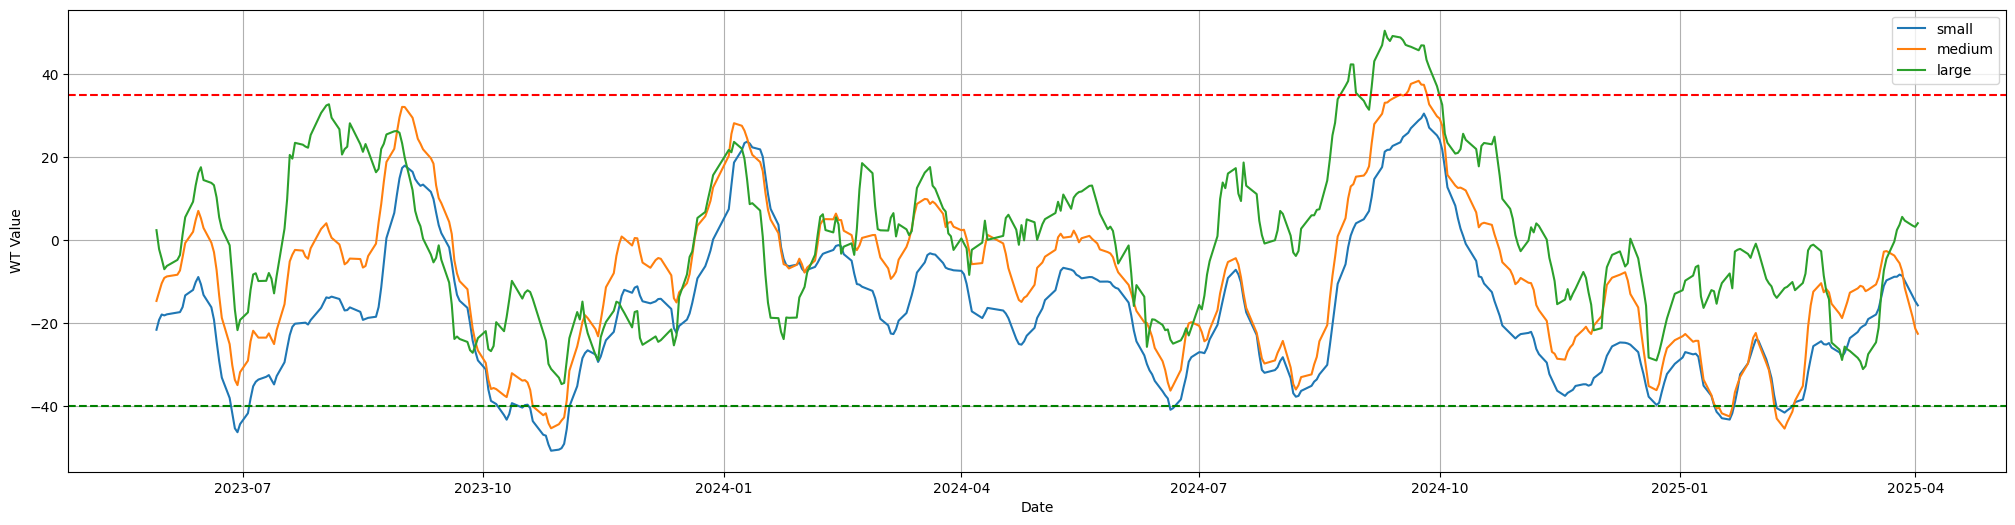

In [67]:
plt.figure(figsize=(25, 6))

plt.plot(swt, label='small', linewidth=1.5)
plt.plot(mwt, label='medium',linewidth=1.5)
plt.plot(bwt, label='large',linewidth=1.5)
plt.axhline(y=35, color='red', linestyle='--')
plt.axhline(y=-40, color='green', linestyle='--')

plt.xlabel("Date")
plt.ylabel("WT Value")
plt.legend()
plt.grid(True)
plt.show()

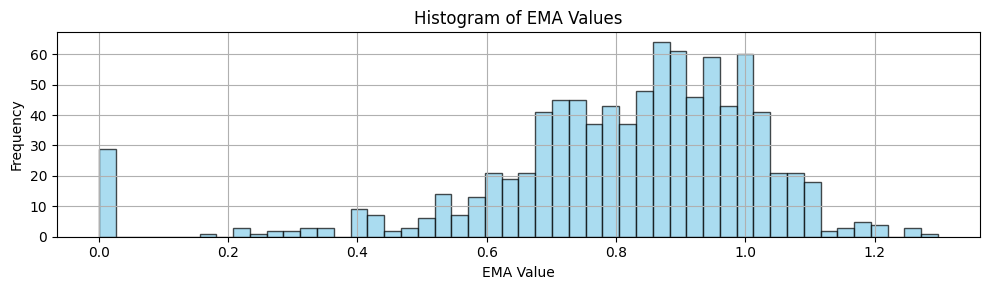

In [68]:
data.columns = data.columns.swaplevel(0, 1)

ema_values = np.zeros(len(tickers))
values = np.zeros(len(tickers))
for idx, ticker in enumerate(tickers):
    try:
        close = data[ticker]['Close'].ffill().dropna()
        ema = ta.ema(close, 200).iloc[-1]
        ema_values[idx] = close.iloc[-1]/ema

        volume = data[ticker]['Volume'].ffill().dropna()
        ema_vol = ta.ema(volume, 20).iloc[-1]
        values[idx] = close.iloc[-1] * ema_vol
    except:
        continue

# Plotting the histogram
plt.figure(figsize=(10, 3))
plt.hist(ema_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('EMA Value')
plt.ylabel('Frequency')
plt.title('Histogram of EMA Values')

# Display grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

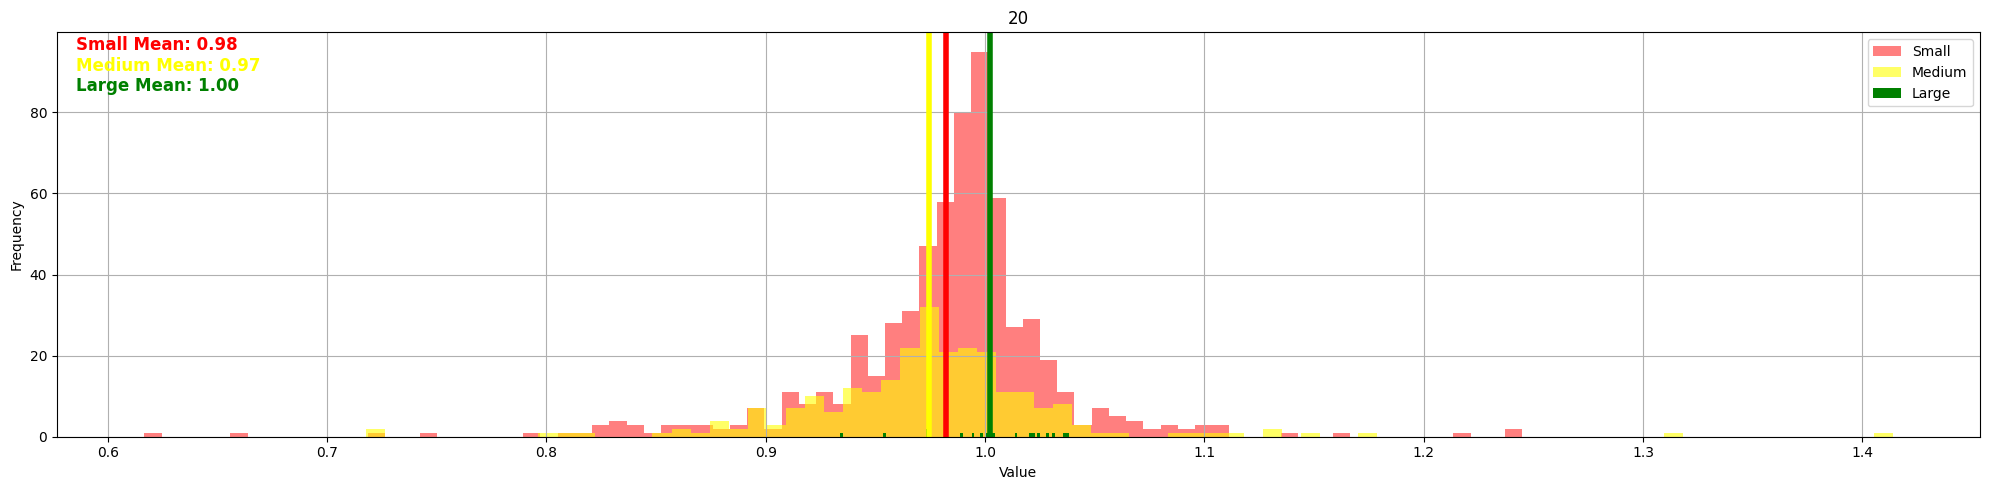

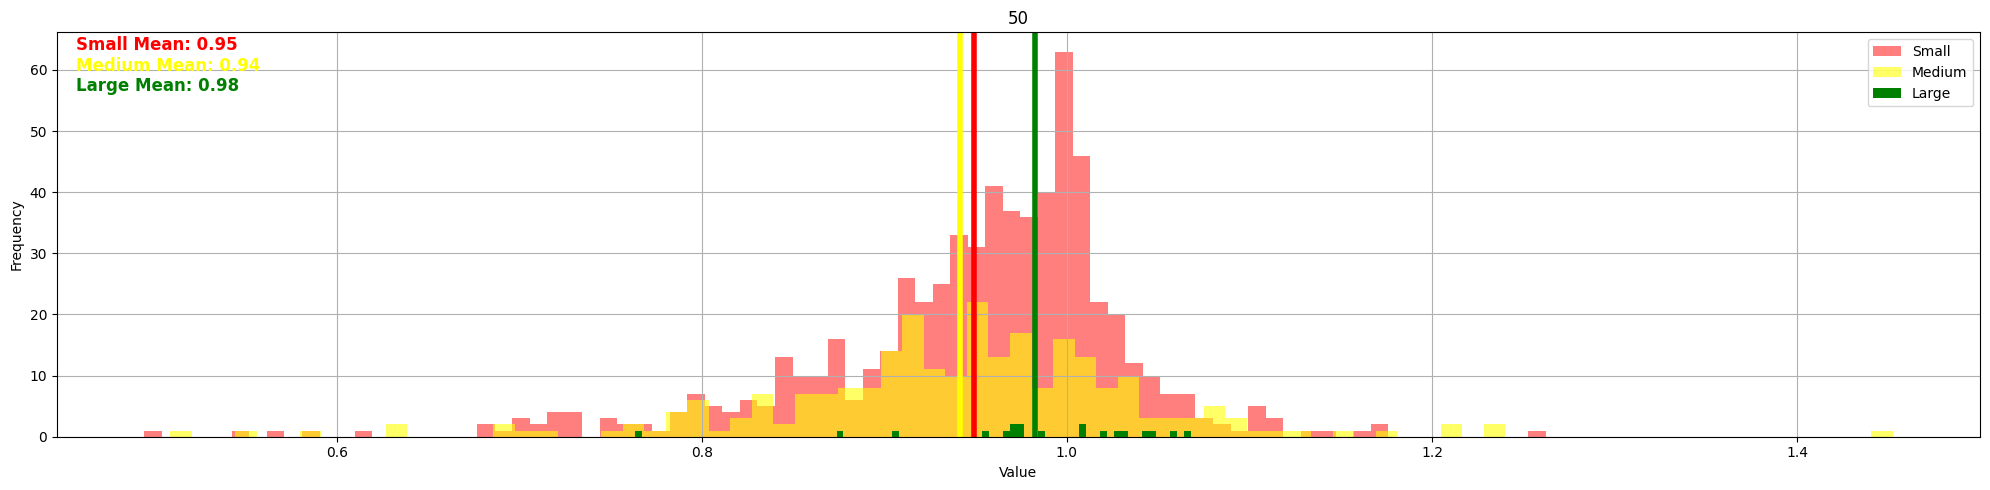

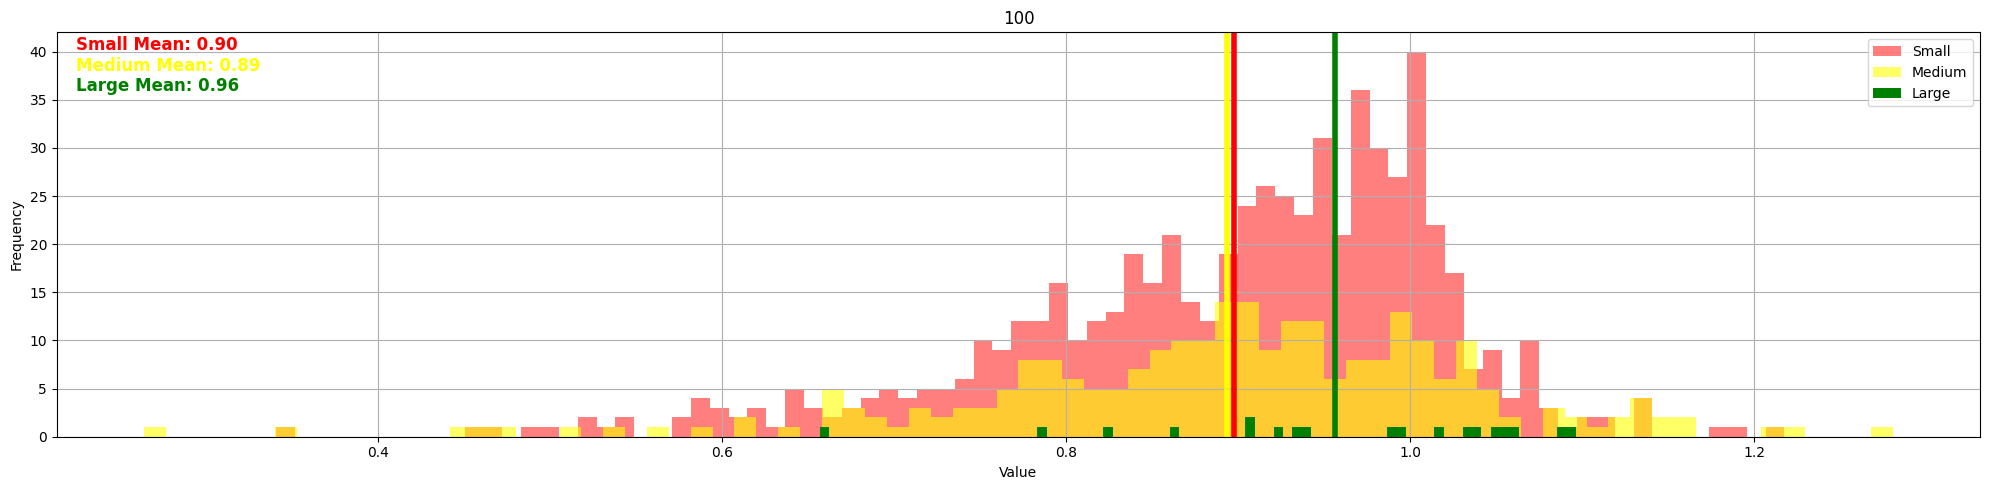

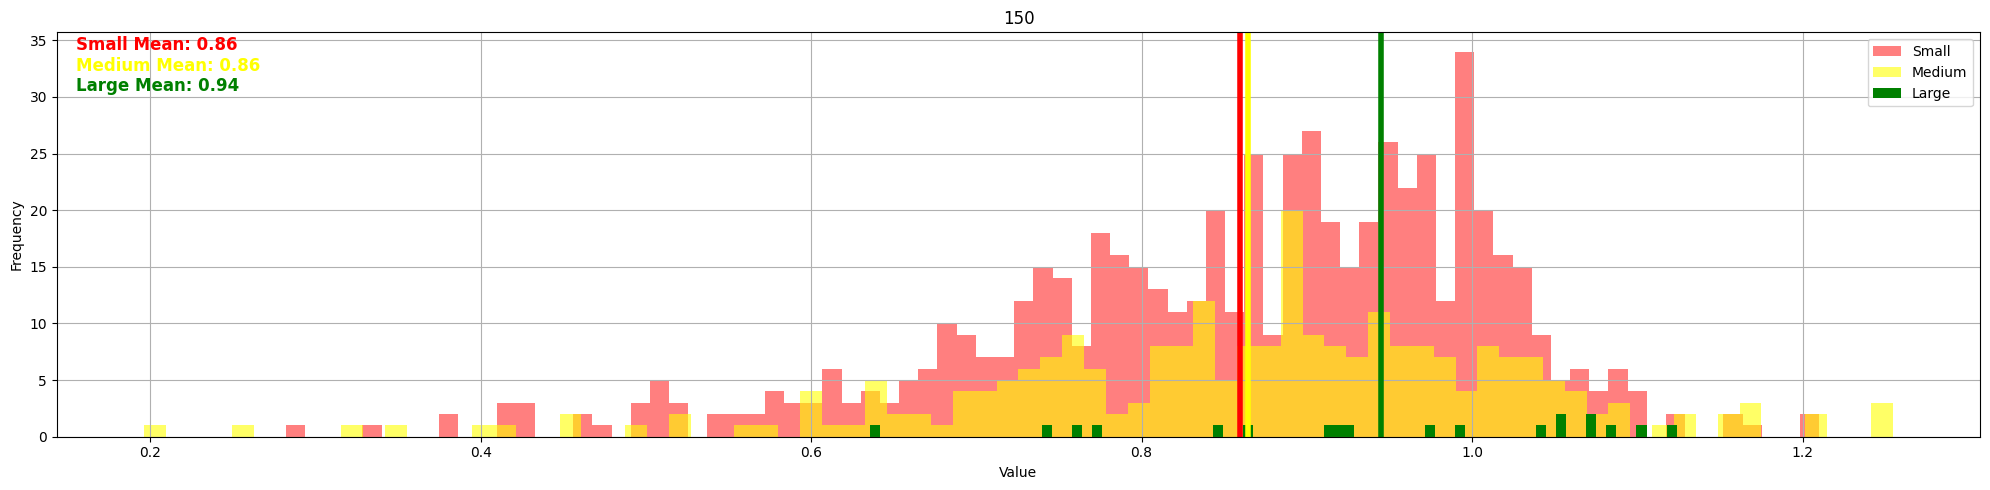

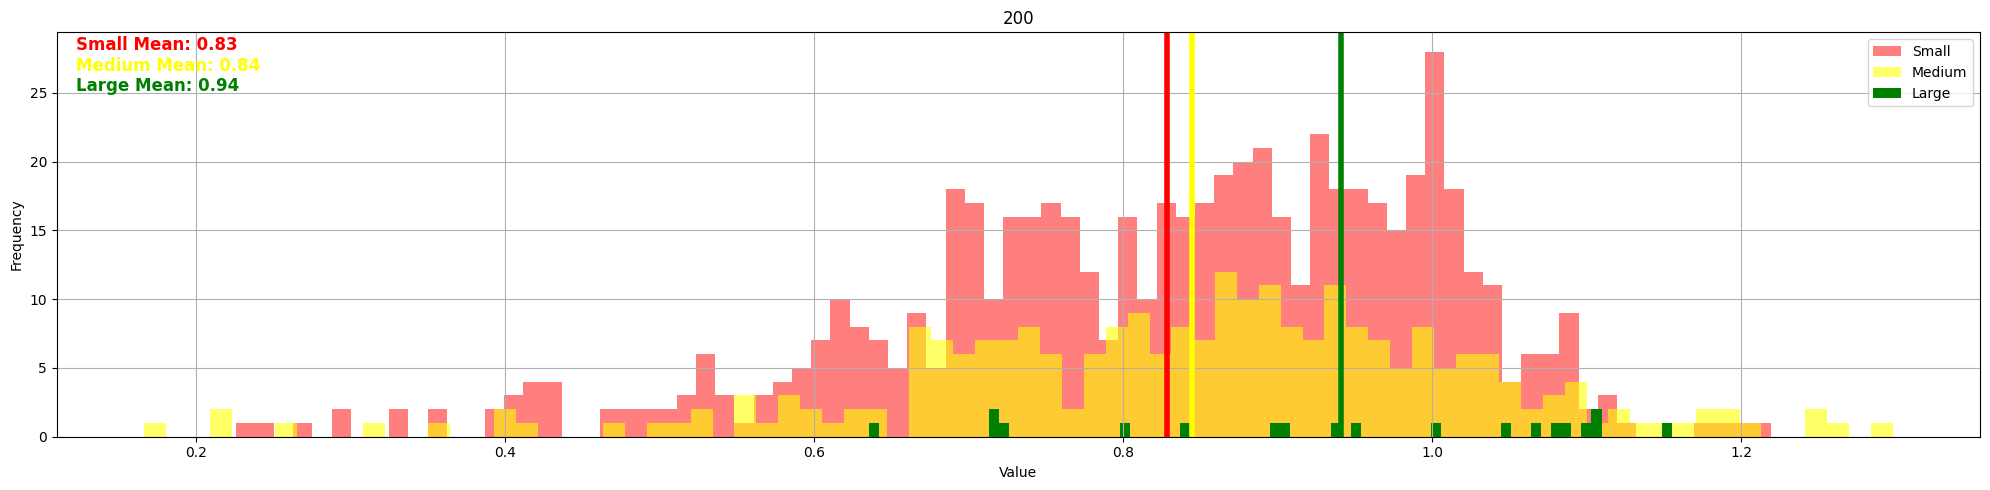

In [72]:
for ema_t in [20, 50, 100, 150, 200]:
    ema_values = np.zeros(len(tickers))
    values = np.zeros(len(tickers))
    for idx, ticker in enumerate(tickers):
        try:
            close = data[ticker]['Close'].ffill().dropna()
            ema = ta.ema(close, ema_t).iloc[-1]
            ema_values[idx] = close.iloc[-1] / ema
    
            volume = data[ticker]['Volume'].ffill().dropna()
            ema_vol = ta.ema(volume, 20).iloc[-1]
            values[idx] = close.iloc[-1] * ema_vol
        except:
            continue
    
    # Categorize values into small, medium, and large
    small_threshold = np.percentile(values, 70)  # 33rd percentile for small
    large_threshold = np.percentile(values, 98)  # 66th percentile for large
    
    small = values <= small_threshold
    medium = (values > small_threshold) & (values <= large_threshold)
    large = values > large_threshold
    
    # Plotting the histogram
    plt.figure(figsize=(20, 5))
    
    # Plot each category with different colors
    plt.hist(ema_values[small][ema_values[small] > 0], bins=80, color='red', alpha=0.5, label='Small')
    plt.hist(ema_values[medium], bins=80, color='yellow', alpha=0.6, label='Medium')
    plt.hist(ema_values[large], bins=80, color='green', alpha=1, label='Large')
    
    red_line = ema_values[small][ema_values[small] > 0].mean()
    yellow_line = ema_values[~(large | small)].mean()
    green_line = ema_values[large].mean()
    
    plt.axvline(x=red_line, color='red', linestyle='-', linewidth=4)
    plt.axvline(x=yellow_line, color='yellow', linestyle='-', linewidth=4)
    plt.axvline(x=green_line, color='green', linestyle='-', linewidth=4)
    
    plt.text(0.01, 0.99, f'Small Mean: {red_line:.2f}', color='red', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
    plt.text(0.01, 0.94, f'Medium Mean: {yellow_line:.2f}', color='yellow', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
    plt.text(0.01, 0.89, f'Large Mean: {green_line:.2f}', color='green', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
    
    # Adding labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(ema_t)
    
    # Display grid and legend
    plt.grid(True)
    plt.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [70]:
np.array(tickers)[small].size, np.array(tickers)[~(large | small)].size, np.array(tickers)[large].size

(640, 255, 19)

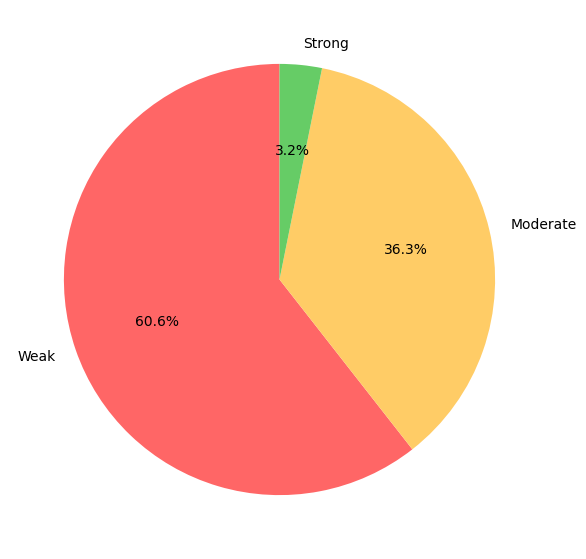

Category distribution:
Weak        536
Moderate    321
Strong       28
Name: count, dtype: int64


In [71]:
strong_threshold = 1.1  # Stocks with relative strength > 1.1 are considered 'Strong'
weak_threshold = 0.9   # Stocks with relative strength < 0.9 are considered 'Weak'

# Create a new Series with groups based on the relative strength
categories = pd.cut(ema_values[ema_values > 0], bins=[-float('inf'), weak_threshold, strong_threshold, float('inf')],
                    labels=["Weak", "Moderate", "Strong"])

# Count the number of stocks in each group
category_counts = categories.value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=["#FF6666", "#FFCC66", "#66CC66"])
plt.ylabel("")  # Hide the y-axis label
plt.show()

# Show the category distribution
print("Category distribution:")
print(category_counts)